In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import GradientBoostingClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit

%matplotlib inline
sns.set(rc={'figure.figsize':(15,12)})

In [2]:
data = pd.read_csv('Train/Train.csv')
data.head()

id                                           ABSTRACT  Computer Science  \
0  1824  a ever-growing datasets inside observational a...                 0   
1  3094  we propose the framework considering optimal $...                 1   
2  8463  nanostructures with open shell transition meta...                 0   
3  2082  stars are self-gravitating fluids inside which...                 0   
4  8687  deep neural perception and control networks ar...                 1   

   Mathematics  Physics  Statistics  Analysis of PDEs  Applications  \
0            0        1           0                 0             0   
1            0        0           0                 0             0   
2            0        1           0                 0             0   
3            0        1           0                 0             0   
4            0        0           0                 0             0   

   Artificial Intelligence  Astrophysics of Galaxies  ...  Methodology  \
0                        0                         0  ...            0   
1                        0                         0  ...            0   
2                        0                         0  ...            0   
3                        0                         0  ...            0   
4                        0                         0  ...            0   

   Number Theory  Optimization and Control  Representation Theory  Robotics  \
0              0                         0                      0         0   
1              0                         0                      0         0   
2              0                         0                      0         0   
3              0                         0                      0         0   
4              0                         0                      0         0   

   Social and Information Networks  Statistics Theory  \
0                                0                  0   
1                                0                  0   
2                                0                  0   
3                                0                  0   
4                                0                  0   

   Strongly Correlated Electrons  Superconductivity  Systems and Control  
0                              0                  0                    0  
1                              0                  0                    0  
2                              1                  0                    0  
3                              0                  0                    0  
4                              0                  0                    0  

[5 rows x 31 columns]

In [3]:
tagData = pd.read_csv('Train/Tags.csv')
tagData.head()

Tags
0          Analysis of PDEs
1              Applications
2   Artificial Intelligence
3  Astrophysics of Galaxies
4  Computation and Language

In [4]:
data = data.drop(['id'], axis=1)

In [5]:
data.shape

(14004, 30)

In [6]:
tagData.shape

(25, 1)

In [7]:
columns = list(data.columns.values)
columns = [e for e in columns if e not in ('ABSTRACT')]
columns.sort()

In [8]:
tags = tagData["Tags"].to_numpy()
tagList = list(tags)
tagList

['Analysis of PDEs',
 'Applications',
 'Artificial Intelligence',
 'Astrophysics of Galaxies',
 'Computation and Language',
 'Computer Vision and Pattern Recognition',
 'Cosmology and Nongalactic Astrophysics',
 'Data Structures and Algorithms',
 'Differential Geometry',
 'Earth and Planetary Astrophysics',
 'Fluid Dynamics',
 'Information Theory',
 'Instrumentation and Methods for Astrophysics',
 'Machine Learning',
 'Materials Science',
 'Methodology',
 'Number Theory',
 'Optimization and Control',
 'Representation Theory',
 'Robotics',
 'Social and Information Networks',
 'Statistics Theory',
 'Strongly Correlated Electrons',
 'Superconductivity',
 'Systems and Control']

In [9]:
columns

['Analysis of PDEs',
 'Applications',
 'Artificial Intelligence',
 'Astrophysics of Galaxies',
 'Computation and Language',
 'Computer Science',
 'Computer Vision and Pattern Recognition',
 'Cosmology and Nongalactic Astrophysics',
 'Data Structures and Algorithms',
 'Differential Geometry',
 'Earth and Planetary Astrophysics',
 'Fluid Dynamics',
 'Information Theory',
 'Instrumentation and Methods for Astrophysics',
 'Machine Learning',
 'Materials Science',
 'Mathematics',
 'Methodology',
 'Number Theory',
 'Optimization and Control',
 'Physics',
 'Representation Theory',
 'Robotics',
 'Social and Information Networks',
 'Statistics',
 'Statistics Theory',
 'Strongly Correlated Electrons',
 'Superconductivity',
 'Systems and Control']

In [10]:
def Diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

In [11]:
Diff(columns, tagList)

['Mathematics', 'Computer Science', 'Statistics', 'Physics']

In [12]:
data["category"] = data[['Computer Science', 'Mathematics', 'Physics', 'Statistics']].idxmax(axis=1)
data.head()

ABSTRACT  Computer Science  \
0  a ever-growing datasets inside observational a...                 0   
1  we propose the framework considering optimal $...                 1   
2  nanostructures with open shell transition meta...                 0   
3  stars are self-gravitating fluids inside which...                 0   
4  deep neural perception and control networks ar...                 1   

   Mathematics  Physics  Statistics  Analysis of PDEs  Applications  \
0            0        1           0                 0             0   
1            0        0           0                 0             0   
2            0        1           0                 0             0   
3            0        1           0                 0             0   
4            0        0           0                 0             0   

   Artificial Intelligence  Astrophysics of Galaxies  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   Computation and Language  ...  Number Theory  Optimization and Control  \
0                         0  ...              0                         0   
1                         0  ...              0                         0   
2                         0  ...              0                         0   
3                         0  ...              0                         0   
4                         0  ...              0                         0   

   Representation Theory  Robotics  Social and Information Networks  \
0                      0         0                                0   
1                      0         0                                0   
2                      0         0                                0   
3                      0         0                                0   
4                      0         0                                0   

   Statistics Theory  Strongly Correlated Electrons  Superconductivity  \
0                  0                              0                  0   
1                  0                              0                  0   
2                  0                              1                  0   
3                  0                              0                  0   
4                  0                              0                  0   

   Systems and Control          category  
0                    0           Physics  
1                    0  Computer Science  
2                    0           Physics  
3                    0           Physics  
4                    0  Computer Science  

[5 rows x 31 columns]

In [13]:
data["sub_category"] = data[tagList].idxmax(axis=1)

In [14]:
data.head()

ABSTRACT  Computer Science  \
0  a ever-growing datasets inside observational a...                 0   
1  we propose the framework considering optimal $...                 1   
2  nanostructures with open shell transition meta...                 0   
3  stars are self-gravitating fluids inside which...                 0   
4  deep neural perception and control networks ar...                 1   

   Mathematics  Physics  Statistics  Analysis of PDEs  Applications  \
0            0        1           0                 0             0   
1            0        0           0                 0             0   
2            0        1           0                 0             0   
3            0        1           0                 0             0   
4            0        0           0                 0             0   

   Artificial Intelligence  Astrophysics of Galaxies  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   

   Computation and Language  ...  Optimization and Control  \
0                         0  ...                         0   
1                         0  ...                         0   
2                         0  ...                         0   
3                         0  ...                         0   
4                         0  ...                         0   

   Representation Theory  Robotics  Social and Information Networks  \
0                      0         0                                0   
1                      0         0                                0   
2                      0         0                                0   
3                      0         0                                0   
4                      0         0                                0   

   Statistics Theory  Strongly Correlated Electrons  Superconductivity  \
0                  0                              0                  0   
1                  0                              0                  0   
2                  0                              1                  0   
3                  0                              0                  0   
4                  0                              0                  0   

   Systems and Control          category  \
0                    0           Physics   
1                    0  Computer Science   
2                    0           Physics   
3                    0           Physics   
4                    0  Computer Science   

                              sub_category  
0   Cosmology and Nongalactic Astrophysics  
1           Data Structures and Algorithms  
2            Strongly Correlated Electrons  
3                           Fluid Dynamics  
4  Computer Vision and Pattern Recognition  

[5 rows x 32 columns]

In [15]:
len(columns)

29

In [16]:
data.drop(columns, axis=1, inplace=True)
data.head()

ABSTRACT          category  \
0  a ever-growing datasets inside observational a...           Physics   
1  we propose the framework considering optimal $...  Computer Science   
2  nanostructures with open shell transition meta...           Physics   
3  stars are self-gravitating fluids inside which...           Physics   
4  deep neural perception and control networks ar...  Computer Science   

                              sub_category  
0   Cosmology and Nongalactic Astrophysics  
1           Data Structures and Algorithms  
2            Strongly Correlated Electrons  
3                           Fluid Dynamics  
4  Computer Vision and Pattern Recognition

In [17]:
validation_df = pd.read_csv('test.csv')
validation_df.head()

id                                           ABSTRACT  Computer Science  \
0   9409  fundamental frequency (f0) approximation from ...                 0   
1  17934  this large-scale study, consisting of 24.5 mil...                 1   
2  16071  we present a stability analysis of the plane c...                 0   
3  16870  we construct finite time blow-up solutions to ...                 0   
4  10496  planetary nebulae (pne) constitute an importan...                 0   

   Mathematics  Physics  Statistics  
0            0        0           1  
1            0        0           1  
2            0        1           0  
3            1        0           0  
4            0        1           0

In [18]:
validation_df["category"] = validation_df[['Computer Science', 'Mathematics',
                                           'Physics', 'Statistics']].idxmax(axis=1)
validation_df.head()

id                                           ABSTRACT  Computer Science  \
0   9409  fundamental frequency (f0) approximation from ...                 0   
1  17934  this large-scale study, consisting of 24.5 mil...                 1   
2  16071  we present a stability analysis of the plane c...                 0   
3  16870  we construct finite time blow-up solutions to ...                 0   
4  10496  planetary nebulae (pne) constitute an importan...                 0   

   Mathematics  Physics  Statistics          category  
0            0        0           1        Statistics  
1            0        0           1  Computer Science  
2            0        1           0           Physics  
3            1        0           0       Mathematics  
4            0        1           0           Physics

In [19]:
validation_df.drop(['Computer Science', 'Mathematics',
                                           'Physics', 'Statistics'], axis=1, inplace=True)
validation_df.head()

id                                           ABSTRACT          category
0   9409  fundamental frequency (f0) approximation from ...        Statistics
1  17934  this large-scale study, consisting of 24.5 mil...  Computer Science
2  16071  we present a stability analysis of the plane c...           Physics
3  16870  we construct finite time blow-up solutions to ...       Mathematics
4  10496  planetary nebulae (pne) constitute an importan...           Physics

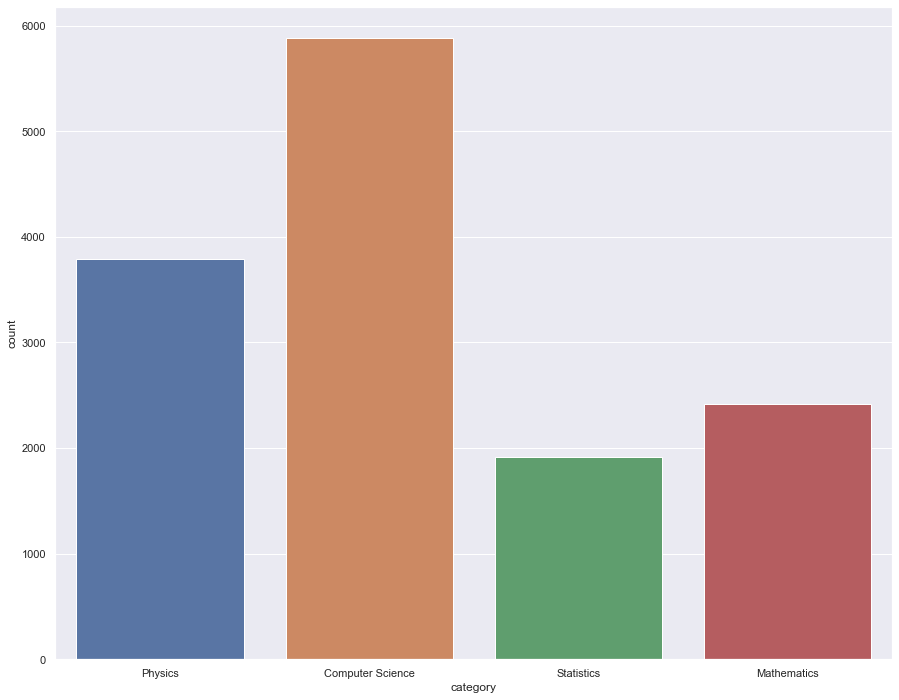

In [20]:
sns.countplot(x ='category', data = data)

In [21]:
relValue = {
    'Computer Science':0,
    'Mathematics':1,
    'Physics':2,
    'Statistics':3
}

data["category"] = data['category'].map(relValue).astype(int)

In [22]:
sub_relValue = {
     'Analysis of PDEs': 0,
     'Applications': 1,
     'Artificial Intelligence': 2,
     'Astrophysics of Galaxies': 3,
     'Computation and Language': 4,
     'Computer Vision and Pattern Recognition': 5,
     'Cosmology and Nongalactic Astrophysics': 6,
     'Data Structures and Algorithms': 7,
     'Differential Geometry': 8,
     'Earth and Planetary Astrophysics': 9,
     'Fluid Dynamics': 10,
     'Information Theory': 11,
     'Instrumentation and Methods for Astrophysics': 12,
     'Machine Learning': 13,
     'Materials Science': 14,
     'Methodology': 15,
     'Number Theory': 16,
     'Optimization and Control': 17,
     'Representation Theory': 18,
     'Robotics': 19,
     'Social and Information Networks': 20,
     'Statistics Theory': 21,
     'Strongly Correlated Electrons': 22,
     'Superconductivity': 23,
     'Systems and Control': 24
}

data["sub_category"] = data['sub_category'].map(sub_relValue).astype(int)

In [23]:
data.head()

ABSTRACT  category  sub_category
0  a ever-growing datasets inside observational a...         2             6
1  we propose the framework considering optimal $...         0             7
2  nanostructures with open shell transition meta...         2            22
3  stars are self-gravitating fluids inside which...         2            10
4  deep neural perception and control networks ar...         0             5

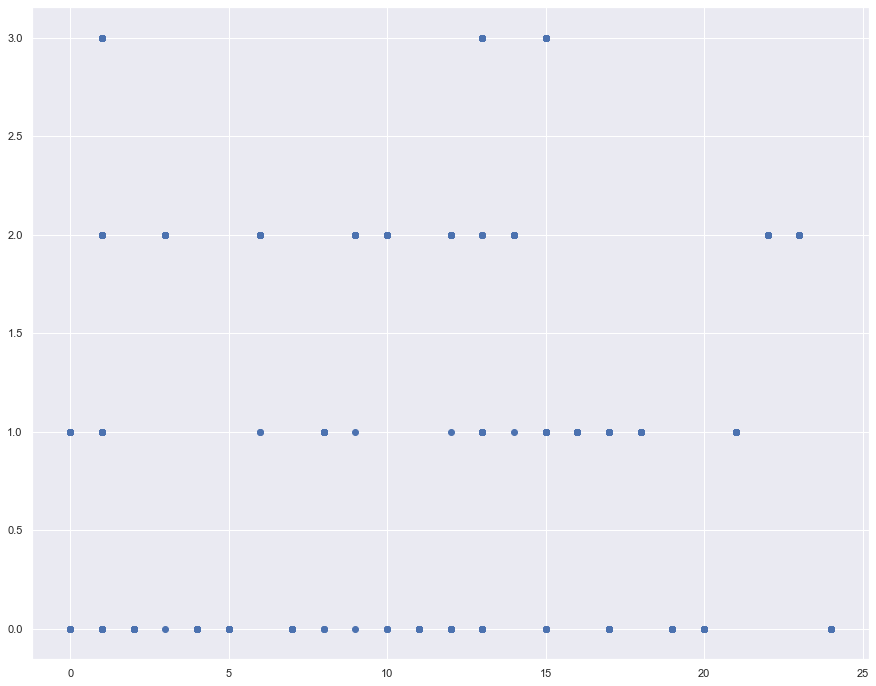

In [24]:
plt.scatter(data['sub_category'], data['category'], marker='o')

In [25]:
data['ABSTRACT'] = data['ABSTRACT'].str.replace("\n", " ")
data['ABSTRACT'] = data['ABSTRACT'].str.replace("\r", " ")
data['ABSTRACT'] = data['ABSTRACT'].str.replace("\t", " ")
data['ABSTRACT'] = data['ABSTRACT'].str.replace("\\", "")
data['ABSTRACT'] = data['ABSTRACT'].str.replace('"', '')
data['ABSTRACT'] = data['ABSTRACT'].str.lower()
data['ABSTRACT'] = data['ABSTRACT'].str.replace('   ', '')
data['ABSTRACT'] = data['ABSTRACT'].str.replace("'s", "")

In [26]:
punctuation_signs = list("?:!.,;-{}()[]\\\'$´-_=ζ£#@/`^*+")
for punct_sign in punctuation_signs:
    data['ABSTRACT'] = data['ABSTRACT'].str.replace(punct_sign, '')

In [27]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(data)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = data.loc[row]['ABSTRACT']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
    
data['Content_lemmitized'] = lemmatized_text_list

In [28]:
#nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

data['Words'] = data['Content_lemmitized']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    data['Words'] = data['Words'].str.replace(regex_stopword, '')

#print(len(df.loc[5]['Words']), len(df.loc[5]['Content_lemmitized']))

print(np.unique(data['category']))

[0 1 2 3]


In [29]:
data.shape

(14004, 5)

In [30]:
data.head()

ABSTRACT  category  sub_category  \
0  a evergrowing datasets inside observational as...         2             6   
1  we propose the framework considering optimal t...         0             7   
2  nanostructures with open shell transition meta...         2            22   
3  stars are selfgravitating fluids inside which ...         2            10   
4  deep neural perception and control networks ar...         0             5   

                                  Content_lemmitized  \
0  a evergrowing datasets inside observational as...   
1  we propose the framework consider optimal tmat...   
2  nanostructures with open shell transition meta...   
3  star be selfgravitating fluids inside which pr...   
4  deep neural perception and control network be ...   

                                               Words  
0   evergrowing datasets inside observational ast...  
1   propose  framework consider optimal tmatching...  
2  nanostructures  open shell transition metal  m...  
3  star  selfgravitating fluids inside  pressure ...  
4  deep neural perception  control network  likel...

In [31]:
X = data[['Words', 'category']]

In [32]:
X.head()

Words  category
0   evergrowing datasets inside observational ast...         2
1   propose  framework consider optimal tmatching...         0
2  nanostructures  open shell transition metal  m...         2
3  star  selfgravitating fluids inside  pressure ...         2
4  deep neural perception  control network  likel...         0

In [33]:
y = data['sub_category']
y.head()

0     6
1     7
2    22
3    10
4     5
Name: sub_category, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data['Words'], 
          data['sub_category'], test_size=0.2, random_state=42, stratify=data['sub_category'])

In [47]:
# TFIDF
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [48]:
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(11203, 300)
(2801, 300)


In [49]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(features_train, labels_train)

xgb_pred = xgb_model.predict(features_test)

print("The test accuracy is: ")
print(accuracy_score(labels_test, xgb_pred))